### Simple ModelGrid Demo

This demo shows how the ModelGrid classes can work, where all model grid functionality is in the model grid class.  Only the geographic reference information and related methods remain in SpatialReference.

In [1]:
import os
import numpy as np
from flopy.grid import StructuredModelGrid
from flopy.grid import SpatialReference
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
tmpdir = 'tmp'
if not os.path.isdir(tmpdir):
    os.makedirs(tmpdir)

Technically you need to create both a SpatialReference object and a ModelGrid object, but in practice the code looks very similar and can easily be implemented in one line.

In [3]:
mg = StructuredModelGrid(delc=np.ones(10), delr=np.ones(10), origin_loc='xll', 
                         origin_x=10, origin_y=10, rotation=20, 
                         sr=SpatialReference(epsg=26715), lenuni=1)

### Transform, xcenters, xedges

Transform, xcenters, xedges behaves the same but is now a method of the ModelGrid, but has the same functionatily. 

In [4]:
mg.transform(10, 10)

(11.82170571129881, 13.906660505012088)

In [5]:
mg.transform(11.82170571129881, 13.906660505012088, inverse=True)

(1.2325683343243838, 14.088320528055176)

Methods to get cell centers of cells from the model grid are now in the ModelGrid classes.

In [6]:
mg.xcenters[1, 7] # x-coordinate at row 1, column 7

11.262031543788444

In [7]:
mg.xcenters[[1, 3], [7, 7]]

array([11.26203154, 11.47052702])

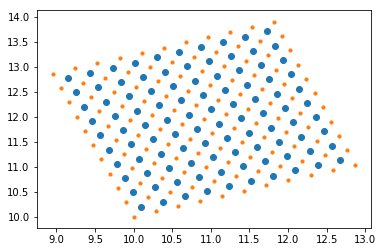

In [8]:
plt.scatter(mg.xcenters.ravel(), mg.ycenters.ravel())
plt.scatter(mg.xgrid.ravel(), mg.ygrid.ravel(), s=10)

### Model Coordinates

The model grid outputs everything in model coordinates if reference information is not given or if the flag use_ref_coords is set to False.

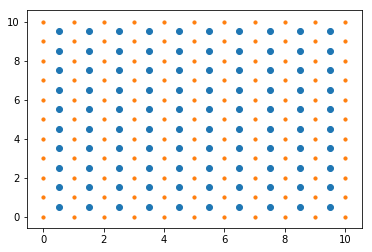

In [9]:
mg.use_ref_coords = False
plt.scatter(mg.xcenters.ravel(), mg.ycenters.ravel())
plt.scatter(mg.xgrid.ravel(), mg.ygrid.ravel(), s=10)

### Grid lines

In [10]:
def plot_lines(lines):
    fig, ax = plt.subplots()
    for ln in lines:
        plt.plot([ln[0][0], ln[1][0]], [ln[0][1], ln[1][1]])

(11, -1)

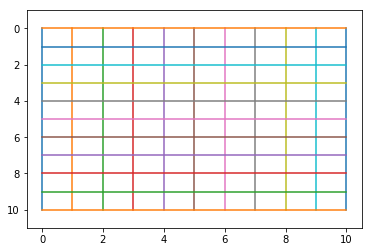

In [19]:
plot_lines(mg.grid_lines)
plt.ylim(11, -1)

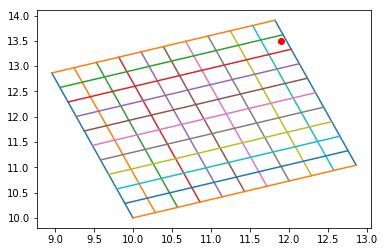

In [20]:
mg.use_ref_coords = True
plot_lines(mg.grid_lines)
plt.scatter(11.9, 13.5, c='r')

### Vertices

In [21]:
mg.use_ref_coords = False
mg.xyvertices[0]

[[0.0, 10.0], [0.0, 9.0], [1.0, 9.0], [1.0, 10.0], [0.0, 10.0]]

In [22]:
mg.use_ref_coords = True
mg.xyvertices[0]

[[8.957522603143362, 12.864183108155448],
 [9.061770342829025, 12.577764797339904],
 [9.34818865364457, 12.68201253702557],
 [9.243940913958907, 12.968430847841113],
 [8.957522603143362, 12.864183108155448]]

(0, 24)

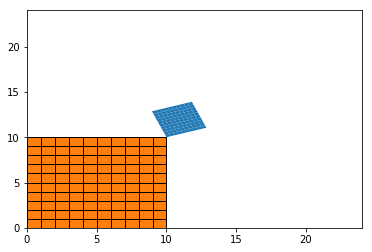

In [23]:
from flopy.utils.geometry import Polygon
from matplotlib.collections import PatchCollection

ref_patches = [Polygon(v).patch for v in mg.xyvertices]
mg.use_ref_coords = False
model_patches = [Polygon(v).patch for v in mg.xyvertices]
fig, ax = plt.subplots()
ax.add_collection(PatchCollection(ref_patches))
ax.add_collection(PatchCollection(model_patches, color='C1', edgecolor='k'))
ax.set_xlim(0, 24)
ax.set_ylim(0, 24)